In [41]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d


plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from matplotlib import cm

from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.close()

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# Jupyter in the Classroom

### Drew C Youngren
#### Columbia University
#### [`http://github.com/drewyoungren/ipynb-demo`](http://github.com/drewyoungren/ipynb-demo)

# One-minute Review

### JUlia-PYThon-E(?)-R


Jupyter, formerly IPython, is a front to an interactive interpreter, the **kernel**. There are many more than the eponymous ones. 

The chief artifact is the **notebook** of which this document is one. 

Notebooks, à la Mathematica, MATLAB, etc., are composed of **cells** of which there are 2 main types:

  - **Mark**_down_ [cells](https://en.wikipedia.org/wiki/Cell_(biology)) like this one, with 
  
  $$\int_0^\pi \frac{Ma^{th}}{e^{it}}dt.$$
  

In [35]:
# Here is a code cell.
12 - 2

11

In [58]:
# OK, Here is a more interesting one.
@interact
def _(angle=(-96,6),vangle=(0,90,6)):
    u = v = np.linspace(-1,1)
    u,v = np.meshgrid(u,v)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = sqrt(1- v**2)
    Y = sqrt(1- v**2)*u
    Z = v
    ax.plot_surface(X,Y,Z)
    ax.plot_surface(Y,X,Z)
    ax.plot_surface(-X,Y,Z)
    ax.plot_surface(Y,-X,Z)
    for ch in 'xyz':
        getattr(ax,f"set_{ch}lim")([-1,1])
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=16)
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)

interactive(children=(IntSlider(value=-45, description='angle', max=6, min=-96), IntSlider(value=42, descripti…

# Interaction

Here are some examples of interactivity in class via Jupyter. Many need improvement and enhancement. 

## Surveys

My best means at the moment for collecting student data on the spot is Google Forms/Sheets.

TODO: Cut out the middle corporation.

In [34]:
IFrame("https://docs.google.com/forms/d/e/1FAIpQLSdbbHtKpsM58SMd_-v9_cQWeFP8dg57ooa9yShbzKYkIeK7Aw/viewform?embedded=true",640,479
    )

In [26]:
from wordcloud import WordCloud
import re

pat = re.compile(r"[^\w']+")   
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTKc14MJjIe5maioo19TKIlVOCEdqVIuE2EspMXDWtTo8_VyChADMpRF_ZeZ2RuGFFu56wQq39x1dA-/pub?output=csv"
df = pd.read_csv(url)
wds = df.fillna("")["Calculus is..."].tolist()
wds = [item.lower() for w in wds for item in pat.split(w)]
wc = WordCloud(background_color="#EEEEFF00",width = 800,height=600).generate(' '.join(wds))

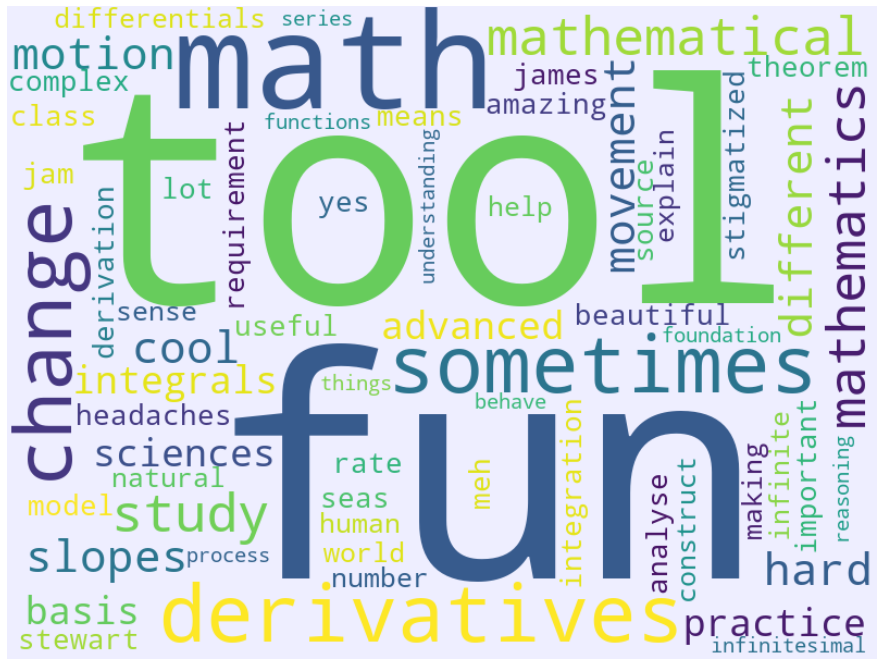

In [27]:
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off");

## Synthesizer

Use collective behavior where possible.

### Example

The definition of the vector projection of $\vec v$ onto $\vec w$ is 

"the multiple of $\vec w$ closest to $\vec v$."

In [57]:
@interact
def _(t=(0.,8,.2),err=False):
    fig,ax = plt.subplots(1, figsize=(6,6))

    ax.set_xlim(0,8)
    ax.set_ylim(0,8)

    ax.arrow(0,0,5,3,color='r',width=.02,head_width=.1,length_includes_head=True)
    ax.arrow(0,0,t,t,color='b',width=.02,head_width=.1,length_includes_head=True)
    if err:
        ax.arrow(t,t,5-t,3-t,color='k',alpha = .3,length_includes_head=True)
#     ax.arrow(0,0,-(1-t)/2,(1-t)*3/2,alpha=.3)
#     ax.arrow(0,0,2*t - (1-t)/2,t + (1-t)*3/2,color='purple', width=.02,head_width=.1)
    ax.grid(True)
    ax.text(2,7,f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-t,3-t])):.4f}$",size=22)
    ax.plot([0,8],[0,8],'k','---',alpha=.2)

interactive(children=(FloatSlider(value=4.0, description='t', max=8.0, step=0.2), Checkbox(value=False, descri…

## "Screws, not glue"

I like to build visualizations for my students that they can manipulate via sliders and similar manipulatives. 


### Example

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ in a flux integral is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

In [38]:
@interact
def _(angle=(-96,6,6),vangle=(0,90,6),
     F=fixed(lambda x,y,z: 1/3*np.array([1+x,1+y,1])),
     r=fixed(lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])),
     ru=fixed(lambda u,v: np.array([1,1/4,-u*2/10])),
     rv=fixed(lambda u,v: np.array([0,1,-v*2/10])),
     level=(1,4,1)):
    u = v = np.linspace(0,1,100)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)
    U,V = np.meshgrid([0,1],[0,1])
    for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
        x = r(*pt)
        a = ru(*pt)
        b = rv(*pt)
        c = 0*np.cross(a,b)
        ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                        (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                        (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
        ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                  [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
        ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                  F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
    x = r(0,0)
    a = ru(0,0)
    b = rv(0,0)
    c = F(*r(0,0))
    for v1,v2 in [[(x+(a+b)/level),(x+(a+b)/level+c)],
             [(x+(a)/level),(x+(a)/level+c)],
             [(x+(b)/level),(x+(b)/level+c)],
             [(x+(a)/level+c),(x+(a+b)/level+c)],
             [(x+(b)/level+c),(x+(a+b)/level+c)],
             [(x+(a)/level+c),(x+c)],
             [(x+(b)/level+c),(x+c)]]:
        ax.plot([v1[0],v2[0]],
                [v1[1],v2[1]],
                [v1[2],v2[2]],'g--')
    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))
#     ax.quiver(0,0,1/2,1,1,1,length=.5,color='b');
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)
#     ax.set_title(F(*r(*pt))[0])
#     ax.plot([1/2,1/2])


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), IntSlider(value=42, d…

TODO: Accessibility, holy moly.

## Commissions

I sometimes solicit constructions from students, so that they think about mathematical structures on large and small scales, and to inject a little creativity into activities.

### Example

Recall that the function $e^{-x^2}$ has the property that it peaks at 1 at $x=0$ and rapidly decays as $x \to \pm \infty$.

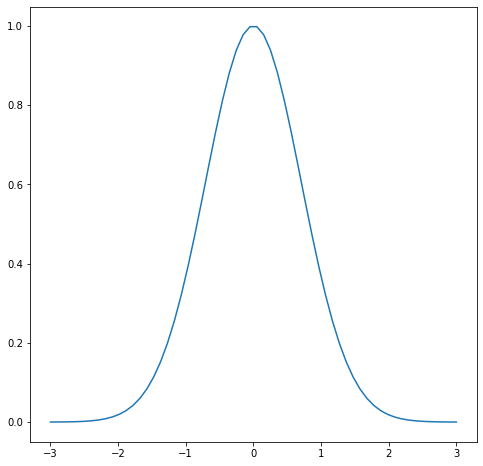

In [55]:
x = np.linspace(-3,3,60)
plt.plot(x,exp(-x**2));

The graph of the following function might be thought of as a "canyon". 

$$f(x,y) = 1-e^{-(y-x^2)^2}$$

In [52]:
def canyon(x,y):
    return 1 - exp(-(y - x**2)**2)

@interact
def _(angle=(-96,6),vangle=(0,90,6),func = fixed(canyon)):
    u = v = np.linspace(-5,5,100)
    X,Y = np.meshgrid(u,v)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,func(X,Y),cmap='gist_earth',vmax=2)

    for ch in 'xyz':
#         getattr(ax,f"set_{ch}lim")([-1,1])
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=16)
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)

interactive(children=(IntSlider(value=-45, description='angle', max=6, min=-96), IntSlider(value=42, descripti…

### Exercise

Make me a volcano.

In [ ]:
def volcano(x,y):
    return # Put code here

@interact
def _(angle=(-96,6),vangle=(0,90,6),func = fixed(volcano)):
    u = v = np.linspace(-5,5,100) # adjust range if desired
    X,Y = np.meshgrid(u,v)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,func(X,Y),cmap='gist_earth',vmax=2)

    for ch in 'xyz':
#         getattr(ax,f"set_{ch}lim")([-1,1])
        getattr(ax,f"set_{ch}label")(f"${ch}$",fontsize=16)
    ax.view_init(vangle,angle)
    ax.patch.set_alpha(0)